In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np

In [ ]:

def get_matrix_block(mat, x0, x1, y0, y1):
        matrix_block = []
        for i in range(x0, x1):
            new_row = []
            for j in range(y0, y1):    
                new_row.append(mat[i][j])
            matrix_block.append(new_row)
        return matrix_block

def mergeblocks(upleft, upright, downleft, downright):
    new_mat = []
    for i in range(len(upleft)):
        new_mat.append(upleft[i] + upright[i])
    
    for i in range(len(downleft)):
        new_mat.append(downleft[i] + downright[i])
        
    return new_mat

def pad_matrix(mat):
    for row in mat:
        row.append(0)
    new_row_length = len(mat[0])  # This now includes the newly added column of zeros.
    mat.append([0] * new_row_length)
    return mat

def matrix_addition(mat1, mat2):
    new_mat = []
    n = len(mat1)
    for i in range(n):
        new_row = []
        for j in range(n):
            new_row.append(mat1[i][j] + mat2[i][j])
        new_mat.append(new_row)
    return new_mat

def matrix_subtraction(mat1, mat2):
    new_mat = []
    n = len(mat1)
    for i in range(n):
        new_row = []
        for j in range(n):
            new_row.append(mat1[i][j] - mat2[i][j])
        new_mat.append(new_row)
    return new_mat

#############################################################
#                                                           #
# Now onto the actual matrix multiplication implementations #
#                                                           #
#############################################################

def conventional_matmult(mat1, mat2):
    new_mat = []
    n = len(mat1[0])
    for i in range(n):
        new_row = []
        for j in range(n):
            sum = 0
            for k in range(n):
                sum += mat1[i][k] * mat2[k][j]       
            new_row.append(sum)    
        new_mat.append(new_row)
    return new_mat

def strassen_matmult(mat1, mat2, threshold):
    init_len = len(mat1)
    if (init_len <= threshold):
        mat_prod = conventional_matmult(mat1, mat2)
        return mat_prod
    if init_len % 2 == 1:
        mat1 = pad_matrix(mat1)
        mat2 = pad_matrix(mat2)
    # Establish an arbitrary base case. To be adjusted

        
    
    # --- Divide the matrices into blocks --- #
    n = len(mat1)
    x = y = (n / 2)
    x = int(x)
    y = int(y)
    
    a = get_matrix_block(mat1, 0, x, 0, y)
    e = get_matrix_block(mat2, 0, x, 0, y) # Upper right blocks
    
    b = get_matrix_block(mat1, 0, x, y, n)
    f = get_matrix_block(mat2, 0, x, y, n) # Upper left blocks
    
    c = get_matrix_block(mat1, x, n, 0, y)
    g = get_matrix_block(mat2, x, n, 0, y) # Lower left blocks
    
    d = get_matrix_block(mat1, x, n, y, n)
    h = get_matrix_block(mat2, x, n, y, n) # Lower right blocks

    
    # --- Calculate multiplication with only 7 variables --- # 
    p1 = strassen_matmult(a, matrix_subtraction(f, h), threshold)
    p2 = strassen_matmult(matrix_addition(a, b), h, threshold)
    p3 = strassen_matmult(matrix_addition(c, d), e, threshold)
    p4 = strassen_matmult(d, matrix_subtraction(g, e), threshold)
    p5 = strassen_matmult(matrix_addition(a, d), matrix_addition(e, h), threshold)
    p6 = strassen_matmult(matrix_subtraction(b, d), matrix_addition(g, h), threshold)
    p7 = strassen_matmult(matrix_subtraction(a, c), matrix_addition(e, f), threshold)

    # --- Calculate the new blocks with these 7 variables --- #
    
    upleft_block = matrix_addition(matrix_subtraction(matrix_addition(p5, p4), p2), p6)
    upright_block = matrix_addition(p1, p2)
    downleft_block = matrix_addition(p3, p4)
    downright_block = matrix_subtraction(matrix_subtraction(matrix_addition(p1, p5), p3), p7)
    
    # Merge the new blocks
    matmult = mergeblocks(upleft_block, upright_block, 
                          downleft_block, downright_block)
    
    return matmult

In [ ]:
def testing_threshold():
    stras_list = []
    conv_list = []
    for dim in range(1, 5):
        matrix =[[random.randint(1,10) for _ in range(dim)] for _ in range(dim)]
        print(matrix)
        #strassens
        stras_avg_runtime = 0
        for _ in range(5):
            start = time.time()
            
            matmult = strassen_matmult(matrix, matrix, ((dim // 2) +1))
            if dim % 2 == 1:
                matmult = [row[:dim] for row in matmult[:dim]]
            end = time.time()
            stras_avg_runtime += (end - start)
        stras_avg_runtime /= 5
        
        stras_list.append(stras_avg_runtime)
        
        #conventional
        conv_avg_runtime = 0
        for _ in range(5):
            start = time.time()
            matmult = conventional_matmult(matrix, matrix)
            end = time.time()
            conv_avg_runtime += (end - start)
        conv_avg_runtime /= 5
        conv_list.append(conv_avg_runtime)
    return stras_list, conv_list

In [ ]:
stras_list, conv_list = testing_threshold()
print(stras_list)

[[4]]


RecursionError: maximum recursion depth exceeded in comparison

In [24]:
stras_list, conv_list = testing_threshold()
dimension = 512

[7.2479248046875e-06, 2.0503997802734374e-06]


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
print(len(dimensions))
print(len(stras_list))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dimensions, stras_list, label='Strassen\'s Method', marker='o')
plt.plot(dimensions, conv_list, label='Conventional Method', marker='x')

plt.xlabel('Matrix Dimension')
plt.ylabel('Average Runtime (seconds)')
plt.title('Comparison of Matrix Multiplication Runtimes')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
import math

def expectation_function(n):
    probabilities = [0.01, 0.02, 0.03, 0.04, 0.05]
    expectations = []
    
    for prob in probabilities:
        expectation = math.comb(n, 3) * np.power(prob, 3)
        expectations.append(expectation)
    
    return probabilities, expectations

def counttriangles(n): 
    probabilities = [0.01, 0.02, 0.03, 0.04, 0.05]

    def count_at_prob(p):
        avg_num_triangles = 0
        for _ in range(1):
            # Create new adjacency matrix
            adj_mat = [[0 for _ in range(n)] for _ in range(n)]
            for i in range(len(adj_mat)):
                for j in range(i+1,len(adj_mat)):
                    val = np.random.binomial(1,p)
                    adj_mat[i][j] = val
                    adj_mat[j][i] = val

            # Find the cube of adjacency matrix
            adj_mat_cubed = conventional_matmult(adj_mat, conventional_matmult(adj_mat, adj_mat))
            num_triangles = 0
            for i in range(n):
                num_triangles += adj_mat_cubed[i][i]
            num_triangles //= 6
            avg_num_triangles += num_triangles
        return avg_num_triangles

    results = []
    for prob in probabilities:
        result = count_at_prob(prob)
        results.append(result)

    return probabilities, results

In [146]:
expected_probabilities, expected_results = expectation_function(1024)
observed_probabilities, observed_results = counttriangles(1024)

KeyboardInterrupt: 

In [145]:
print(expected_results)

[178.43302400000002, 1427.4641920000001, 4817.691647999999, 11419.713536000001, 22304.128000000004]


In [147]:
print(observed_results)

[141, 1434, 4906, 11741, 22071]


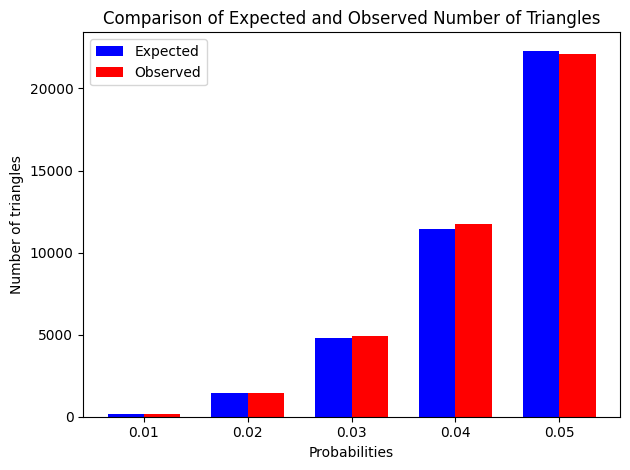

In [144]:
bar_width = 0.35
fig, ax = plt.subplots()
positions1 = np.arange(len(expected_probabilities))
positions2 = [pos + bar_width for pos in positions1]

ax.bar(positions1, expected_results, bar_width, label='Expected', color='b')
ax.bar(positions2, observed_results, bar_width, label='Observed', color='r')

ax.set_xlabel('Probabilities')
ax.set_ylabel('Number of triangles')
ax.set_title('Comparison of Expected and Observed Number of Triangles')
ax.set_xticks(positions1 + bar_width / 2)
ax.set_xticklabels([str(p) for p in expected_probabilities])
ax.legend()

plt.tight_layout()
plt.show()
